# **a backround about the titanic sank**
* RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City.
* The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912.
* the ship sanked two hours and forty minutes later at 02:20 (ship's time) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.


In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


first lets Acquire the data

In [ ]:
train_df = pd.read_csv('/content/sample_data/train (1).csv')
test_df = pd.read_csv('/content/sample_data/test (1).csv')
combine = [train_df, test_df]
# submission = pd.read_csv('../input/titanic/gender_submission.csv')

have a fisrt look on the features

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# classifay the features categorical/numerical -# 
Categorical: Survived, Sex, Embarked, Pclass.

numerical: Age, Fare, SibSp, Parch.

# the distribution of numerical feature values across the samples

*  38% samples survived 
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings aboard
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# the distribution of categorical features
* Names are unique across the dataset
* Sex variable as two possible values with 65% male
* Cabin values have several dupicates across samples.
* Embarked takes three possible values. S port used by most passengers.
* Ticket feature has high ratio (22%) of duplicate values



In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carter, Rev. Ernest Courtenay",male,1601,B96 B98,S
freq,1,577,7,4,644


showing distributions in graphs

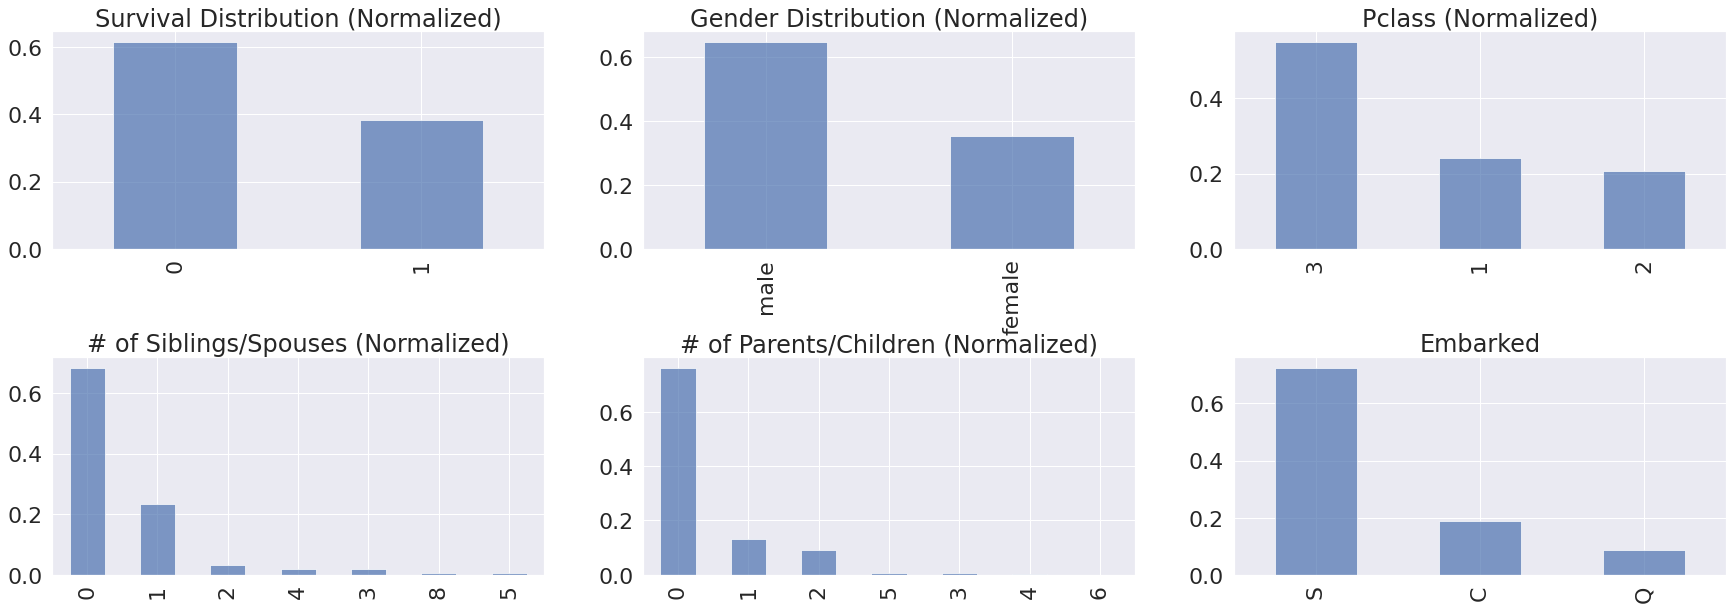

In [ ]:
fig = plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((2,3), (0,0))
train_df['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Survival Distribution (Normalized)')

plt.subplot2grid((2,3), (0,1))
train_df['Sex'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Gender Distribution (Normalized)')

plt.subplot2grid((2,3), (0,2))
train_df['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Pclass (Normalized)')

plt.subplot2grid((2,3), (1,0))
train_df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses (Normalized)')

plt.subplot2grid((2,3), (1,1))
train_df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children (Normalized)')

plt.subplot2grid((2,3), (1,2))
train_df['Embarked'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Embarked')
plt.show()

checking for Missing values, because some algorithms don't know how-to handle null values and will fail. Thus, it's important to fix before we start modeling.

In [ ]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


# Correcting
complete missing values in train and test data

In [ ]:
for dataset in combine:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    

print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
----------


# Correcting

* Ticket feature will be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature will be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId will be dropped from training dataset as it does not contribute to survival.
* Name feature does not contribute to survival so will be dropped, but we will analyze the titles before.

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]


We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


replace many titles with a more common name or classify them as Rare.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


convert the categorical titles to ordinal.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


now its ok to drop the name and PassengerId features

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

lets see how sex correlate with survivel

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


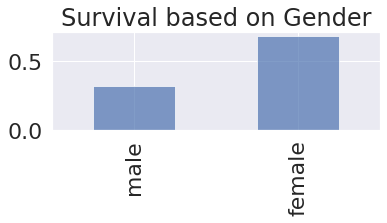

In [ ]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((4,3), (0,2))
train_df['Sex'][train_df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7)
plt.title('Survival based on Gender')
plt.show()

convert features which contain strings to numerical values.

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


lets see how age correlate with survivel

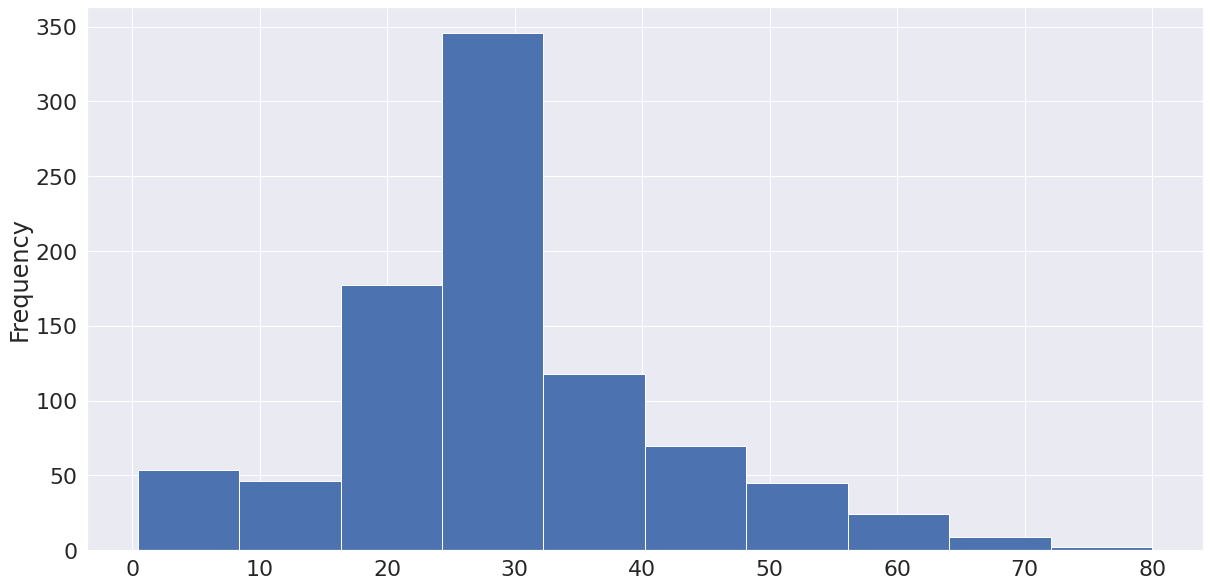

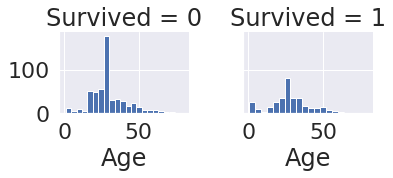

In [ ]:
train_df['Age'].plot(kind='hist')
graph = sns.FacetGrid(train_df, col='Survived')
graph.map(plt.hist, 'Age', bins=20)

create Age bands and replace Age with ordinals based on these bands.

finally we can drop the AgeBand feature.

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

We can now create FareBand and Convert the Fare feature to ordinal values based on the FareBand.

finally drop the FareBand feature.


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0,0,1.0
1,1,1,1,2.0,1,0,3,1,3.0
2,1,3,1,1.0,0,0,1,0,2.0
3,1,1,1,2.0,1,0,3,0,3.0
4,0,3,0,2.0,0,0,1,0,1.0
5,0,3,0,1.0,0,0,1,2,1.0
6,0,1,0,3.0,0,0,3,0,1.0
7,0,3,0,0.0,3,1,2,0,4.0
8,1,3,1,1.0,0,2,1,0,3.0
9,1,2,1,0.0,1,0,2,1,3.0


create a new feature for FamilySize which combines Parch and SibSp.

create another feature called IsAlone.

Finally we will drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,0,2,1,1
1,893,3,1,2.0,0,0,3,0
2,894,2,0,3.0,1,2,1,1
3,895,3,0,1.0,1,0,1,1
4,896,3,1,1.0,1,0,3,0
5,897,3,0,0.0,1,0,1,1
6,898,3,1,1.0,0,2,2,1
7,899,2,0,1.0,2,0,1,0
8,900,3,1,1.0,0,1,3,1
9,901,3,0,1.0,2,0,1,0


lets see how Pclass, Embarked and ISAlone correlate with survivel

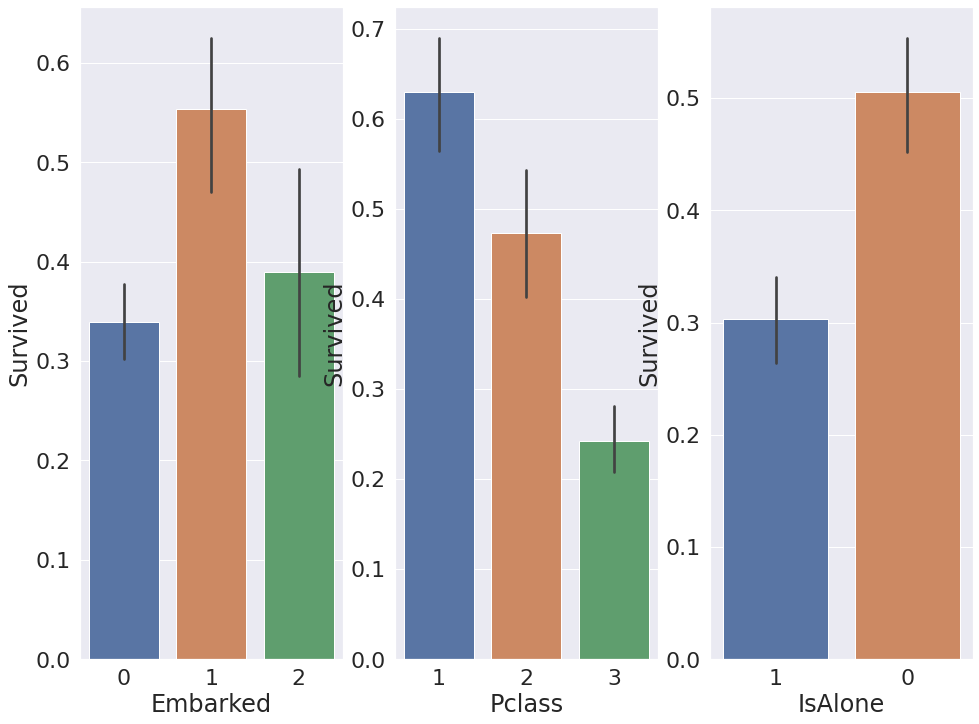

In [ ]:
fig, saxis = plt.subplots(1, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=train_df, ax = saxis[0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_df, ax = saxis[1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train_df, ax = saxis[2])

In [ ]:
t = train_df['Survived']
X = train_df.drop('Survived', axis=1)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

In [ ]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.23764661 0.76235339]
 [0.46018994 0.53981006]
 [0.94093633 0.05906367]
 [0.80485863 0.19514137]
 [0.93574831 0.06425169]]

first 5 predictions of y_train:
[1 1 0 0 0]

first 5 probabilities of y_test_prob:
[[0.68146287 0.31853713]
 [0.93574831 0.06425169]
 [0.2628816  0.7371184 ]
 [0.94528256 0.05471744]
 [0.4612681  0.5387319 ]]

first 5 predictions of y_test:
[0 0 1 0 1]


In [ ]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))
full_test_df = test_df.copy()
test_passengerID = test_df['PassengerId']
test_df.drop('PassengerId', axis=1, inplace=True)
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
prediction = SGD_cls.predict(test_df)

output = pd.DataFrame({'PassengerId': test_passengerID, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Accuracy score on train 0.7949438202247191
Accuracy score on test 0.776536312849162

CE on train 0.43170792751218007
CE on test 0.5365013158378534
Your submission was successfully saved!


# Exercise 3:

In [ ]:
# clone the lwlr repo from github
!git clone https://github.com/qiaochen/CourseExercises

fatal: destination path 'CourseExercises' already exists and is not an empty directory.


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0,0,1.0,0
1,1,1,1,2.0,3,1,3.0,0
2,1,3,1,1.0,1,0,2.0,1
3,1,1,1,2.0,3,0,3.0,0
4,0,3,0,2.0,1,0,1.0,1


# Feature engineering

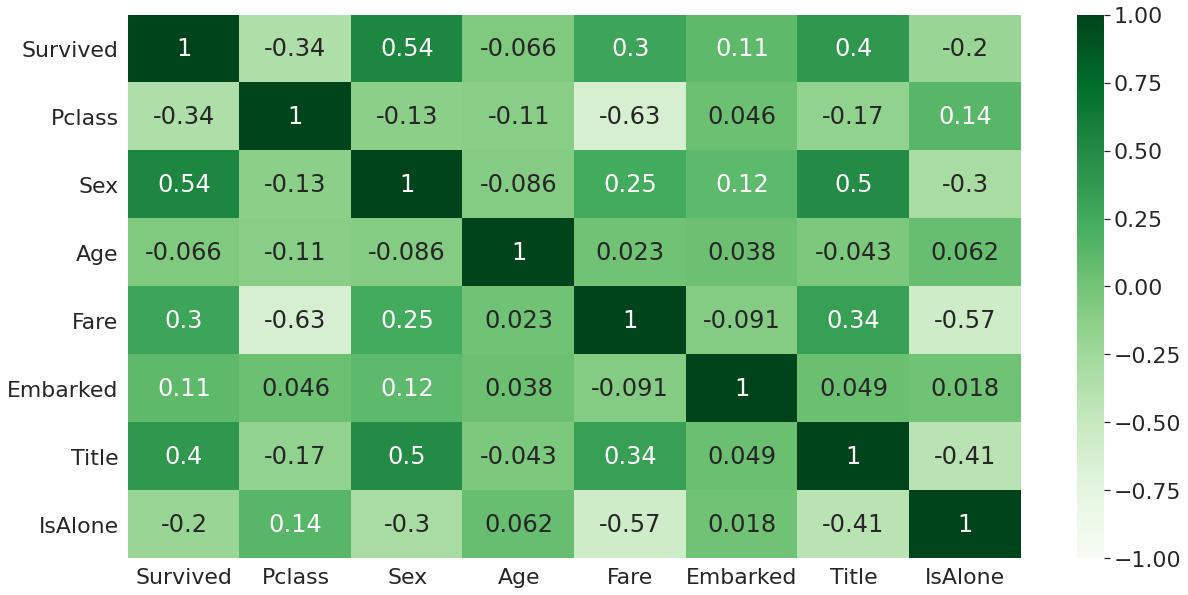

In [ ]:

cor = train_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(),annot=True,cmap='Greens', vmin=-1, vmax=1)

Lets merge the following features (over 0.4 correlation): 


*   Fare & Pclass
*   Fare & isAlone
*   Title & isAlone
*   sex & Title




In [ ]:
def merge_features(df, f1, f2):
    df[f1 + '+' + f2] = df[f1] + df[f2]
    df[f1 + '*' + f2] = df[f1] * df[f2]

# merge train columns
merge_features(train_df, 'Fare', 'Pclass')
merge_features(train_df, 'Fare', 'IsAlone')
merge_features(train_df, 'Title', 'IsAlone')
merge_features(train_df, 'Sex', 'Title')

# merge test columns
merge_features(test_df, 'Fare', 'Pclass')
merge_features(test_df, 'Fare', 'IsAlone')
merge_features(test_df, 'Title', 'IsAlone')
merge_features(test_df, 'Sex', 'Title')

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Fare+Pclass,Fare*Pclass,Fare+IsAlone,Fare*IsAlone,Title+IsAlone,Title*IsAlone,Sex+Title,Sex*Title
0,0,3,0,1.0,0,0,1.0,0,3,0,0,0,1.0,0.0,1.0,0.0
1,1,1,1,2.0,3,1,3.0,0,4,3,3,0,3.0,0.0,4.0,3.0
2,1,3,1,1.0,1,0,2.0,1,4,3,2,1,3.0,2.0,3.0,2.0
3,1,1,1,2.0,3,0,3.0,0,4,3,3,0,3.0,0.0,4.0,3.0
4,0,3,0,2.0,1,0,1.0,1,4,3,2,1,2.0,1.0,1.0,0.0


### Feature selection:

We will find the optimal feature set with RFECV.

In [ ]:
X = train_df.drop(['Survived'], axis=1).copy()
t = train_df['Survived'].copy()

# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

X_normalized = StandardScaler().fit_transform(X)

selector = RFECV(SGDClassifier(random_state=1), cv=RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)).fit(X_normalized, t)
display(X.loc[:, selector.support_])

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

,Pclass,Sex,Age,Embarked,IsAlone,Title*IsAlone,Sex+Title
0,3,0,1.0,0,0,0.0,1.0
1,1,1,2.0,1,0,0.0,4.0
2,3,1,1.0,0,1,2.0,3.0
3,1,1,2.0,0,0,0.0,4.0
4,3,0,2.0,0,1,1.0,1.0
...,...,...,...,...,...,...,...
886,2,0,1.0,0,1,5.0,5.0
887,1,1,1.0,0,1,2.0,3.0
888,3,1,1.0,0,0,0.0,3.0
889,1,0,1.0,1,1,1.0,1.0


In [ ]:
df_fs = X.loc[:, selector.support_].copy()
test_df_fs = test_df[list(df_fs.columns)]
df_fs.head()

,Pclass,Sex,Age,Embarked,IsAlone,Title*IsAlone,Sex+Title
0,3,0,1.0,0,0,0.0,1.0
1,1,1,2.0,1,0,0.0,4.0
2,3,1,1.0,0,1,2.0,3.0
3,1,1,2.0,0,0,0.0,4.0
4,3,0,2.0,0,1,1.0,1.0


# Model engineering


Search for optimal hyper-parameters using Random search:

In [ ]:
X_normalized = StandardScaler().fit_transform(df_fs)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_normalized, t)
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

rs_model 0.7856192329420627
best params {'alpha': 0.0923385947687978, 'penalty': 'l2'}


Search for optimal hyper-parameters using Grid search:

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_normalized, t)
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

gs_model 0.7867365513778168
best params {'alpha': 0.01, 'penalty': 'l2'}


We found better hyper-parameters with Grid search, The hyper-parameters are:
alpha : 0.01
penalty: l2

In [ ]:
params = {'random_state': 1, 'penalty': 'l2', 'alpha': 0.001}

## Optimal ensemble search

In [ ]:
import plotly.express as px

def show_parameter_effect(model, X, t, n, param, is_cv, model_params={}, model_name=''):
    if(is_cv):
        val_score_df = pd.DataFrame(columns=[param, model_name + ' Validation Score'])
        for i in range(1, n):
            hyper_parameters = {param: i}
            val_score = cross_val_score(model(**hyper_parameters), X, t, **model_params, cv = 20).mean()
            val_score_df.loc[len(val_score_df)] = [i, val_score]

        fig = px.line(val_score_df, x=param, y=' Validation Score')
        fig.show()
    else:
        score_df = pd.DataFrame(columns=[param, model_name+' Score'])
        for i in range(1, n):
            hyper_parameters = {param: i}
            classifier = model(**model_params, **hyper_parameters, random_state=1).fit(X, t)
            score = classifier.score(X, t).mean()
            score_df.loc[len(score_df)] = [i, score]

        fig = px.line(score_df, x=param, y=model_name+' Score')
        fig.show()

NFold Bagging:

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(**params), n_estimators=20, random_state=1, bootstrap=False).fit(X_normalized, t)
print('bag_fold_model', bag_fold_model.score(X_normalized, t).mean())

model_parameters = {'base_estimator': SGDClassifier(**params), 'bootstrap': False}
show_parameter_effect(BaggingClassifier, X_normalized, t, 10, 'n_estimators', model_params=model_parameters, model_name='BaggingClassifier', is_cv=False)

bag_fold_model 0.7856341189674523


AdaBoosting:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=1).fit(X_normalized, t)
print('ada_boost_model', ada_boost_model.score(X_normalized, t).mean())

show_parameter_effect(AdaBoostClassifier, X_normalized, t, 50, 'n_estimators', is_cv=False, model_name='AdaBoostClassifier')

ada_boost_model 0.8159371492704826


GradientBoosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=1).fit(X_normalized, t)
print('grad_boost_model', grad_boost_model.score(X_normalized, t).mean())

show_parameter_effect(GradientBoostingClassifier, X_normalized, t, 50, 'n_estimators', is_cv=False, model_name='GradientBoostingClassifier')

grad_boost_model 0.8361391694725028


**GradientBoosting performs slightly better than the others**

#Optimal alternative model search

Naive Bayes:

In [ ]:
from sklearn.naive_bayes import MultinomialNB

print('MultinomialNB score:', cross_val_score(MultinomialNB(), df_fs, t, cv=20).mean())

MultinomialNB score: 0.7821969696969697


Gaussian naive bayes classifier:

In [ ]:
from sklearn.naive_bayes import GaussianNB 

print('GaussianNB score:', cross_val_score(GaussianNB(), df_fs, t, cv=20).mean())

GaussianNB score: 0.7844696969696969


 the gaussian naive bayes classifier preforms slightly better

KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

hyper_parameters = {'n_neighbors': list(range(1, 50))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters, cv=20).fit(X_normalized, t)
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

show_parameter_effect(KNeighborsClassifier, X_normalized, t, 50, 'n_neighbors', is_cv=True)

gs_neigh_model 0.816969696969697
best params {'n_neighbors': 16}


KNN's optimal number of neighbors is 16.

# Model analysing

KPI functions:

In [ ]:
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

A confusion matrix plot:

In [ ]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(t, y):
    cm = confusion_matrix(t, y)
    tn, fp, fn, tp = cm.ravel()
    print(f'CM: TN {tn:4}, FP {fp:4}, FN {fn:4}, TP {tp:4}')
    print('CM: Precision =', '{:.3f}'.format(precision(cm)), '| Recall =', '{:.3f}'.format(recall(cm)), '| Specificity =', '{:.3f}'.format(specificity(cm)), '| Fpr =', '{:.3f}'.format(fpr(cm)), '| Accuracy =', '{:.3f}'.format(accuracy(cm)))
    cm_df = pd.DataFrame(cm, index=['actual_n', 'actual_p'], columns=['predicted_n', 'predicted_p'])
    plt.figure(figsize = (5,5))
    fig = sns.heatmap(cm_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title("confusion matrix")
    plt.show()

KNN analysis

CM: TN  508, FP   41, FN  111, TP  231
CM: Precision = 0.849 | Recall = 0.675 | Specificity = 0.925 | Fpr = 0.075 | Accuracy = 0.829


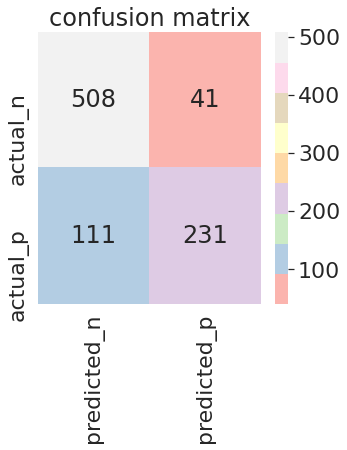

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_normalized, t)
y = knn_model.predict(X_normalized)
show_confusion_matrix(t, y)

KNN KPI's:
* Precision 0.849
* Recall = 0.675 
* Specificity = 0.925 
* Fpr = 0.075 
* Accuracy = 0.829

CM: TN  523, FP   26, FN  120, TP  222
CM: Precision = 0.895 | Recall = 0.649 | Specificity = 0.953 | Fpr = 0.047 | Accuracy = 0.836


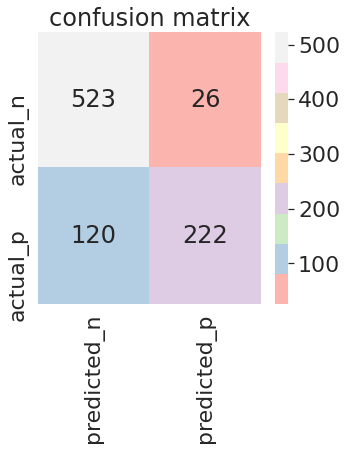

In [ ]:
grad_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=1).fit(X_normalized, t)
y = grad_boost_model.predict(X_normalized)
show_confusion_matrix(t, y)

### GradientBoosting KPI's:
* Precision = 0.895
* Recall = 0.649 
* Specificity = 0.953 
* Fpr = 0.047 
* Accuracy = 0.836

CM: TN  467, FP   82, FN  105, TP  237
CM: Precision = 0.743 | Recall = 0.693 | Specificity = 0.851 | Fpr = 0.149 | Accuracy = 0.790


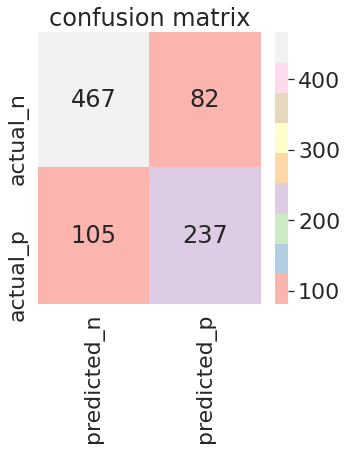

In [ ]:
sgd_model = SGDClassifier(**params).fit(X_normalized, t)
y = sgd_model.predict(X_normalized)
show_confusion_matrix(t, y)

### SGD KPI's:
* Precision = 0.742
* Recall = 0.681 
* Specificity = 0.852 
* Fpr = 0.148 
* Accuracy = 0.787

the best of :
* pricison : GradientBoosting
* Recall : SGD
* Specificity : GradientBoosting
* Fpr : GradientBoosting 
* Accuracy : GradientBoosting

the best is GradientBoosting.

## Submitting with SGD:

In [ ]:
X_test_normalized = StandardScaler().fit_transform(test_df_fs)

predictions = sgd_model.predict(X_test_normalized)

submission = pd.DataFrame({'PassengerId': full_test_df['PassengerId'],'Survived':predictions})

filename = 'Titanic Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')
print(submission.head(5))

Saved file: Titanic Predictions.csv 

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


## Submitting with GradientBoosting: 

In [ ]:
predictions = grad_boost_model.predict(X_test_normalized)
submission = pd.DataFrame({'PassengerId': full_test_df['PassengerId'],'Survived':predictions})

filename = 'Titanic Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')
print(submission.head(5))

Saved file: Titanic Predictions.csv 

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


## Submitting with KNN:

In [ ]:
predictions = knn_model.predict(X_test_normalized)

submission = pd.DataFrame({'PassengerId': full_test_df['PassengerId'],'Survived':predictions})

filename = 'Titanic Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')
print(submission.head(5))

Saved file: Titanic Predictions.csv 

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
